In [150]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [151]:
def perform_erosion(image, structuring_element_size):
    height, width = image.shape
    errored_image = np.zeros(image.shape)
    kernel = np.ones((structuring_element_size, structuring_element_size))

    padding = structuring_element_size // 2

    strarting_row = 0 + padding
    strarting_col = 0 + padding
    ending_row = height - padding
    ending_col = width - padding

    for row in range(padding, height - padding):
        for col in range(padding, width - padding):
            reigion = image[row - padding : row + padding + 1, col - padding : col + padding + 1]
            errored_image[row, col] = np.min(reigion * kernel)
    return errored_image

In [152]:
def perform_dilation(image, structuring_element_size):
    height, width = image.shape
    dilated_image = np.zeros(image.shape)
    kernel = np.ones((structuring_element_size, structuring_element_size))

    padding = structuring_element_size // 2

    strarting_row = 0 + padding
    strarting_col = 0 + padding
    ending_row = height - padding
    ending_col = width - padding

    for row in range(padding, height - padding):
        for col in range(padding, width - padding):
            reigion = image[row - padding : row + padding + 1, col - padding : col + padding + 1]
            dilated_image[row, col] = np.max(reigion * kernel)
    return dilated_image

In [153]:
def perform_opening(image, structuring_element_size):
    opened_image = perform_erosion(image, structuring_element_size)
    opened_image = perform_dilation(opened_image, structuring_element_size)

    return opened_image

In [154]:
def perform_closing(image, structuring_element_size):
    # Perform Dilation followed by Erosion (Closing)
    closed_image = perform_dilation(image, structuring_element_size)
    closed_image = perform_erosion(closed_image, structuring_element_size)

    return closed_image

In [155]:
original_image1 = cv2.imread('./images/opening.png', 0)
original_image2 = cv2.imread('./images/closing.jpg', 0)
gray_image1 = cv2.resize(original_image1, (512, 512))
gray_image2 = cv2.resize(original_image2, (512, 512))

In [156]:
structuring_element_size = 5
oppened_image = perform_opening(gray_image1, structuring_element_size)

structuring_element_size = 11
closed_image = perform_closing(gray_image2, structuring_element_size)

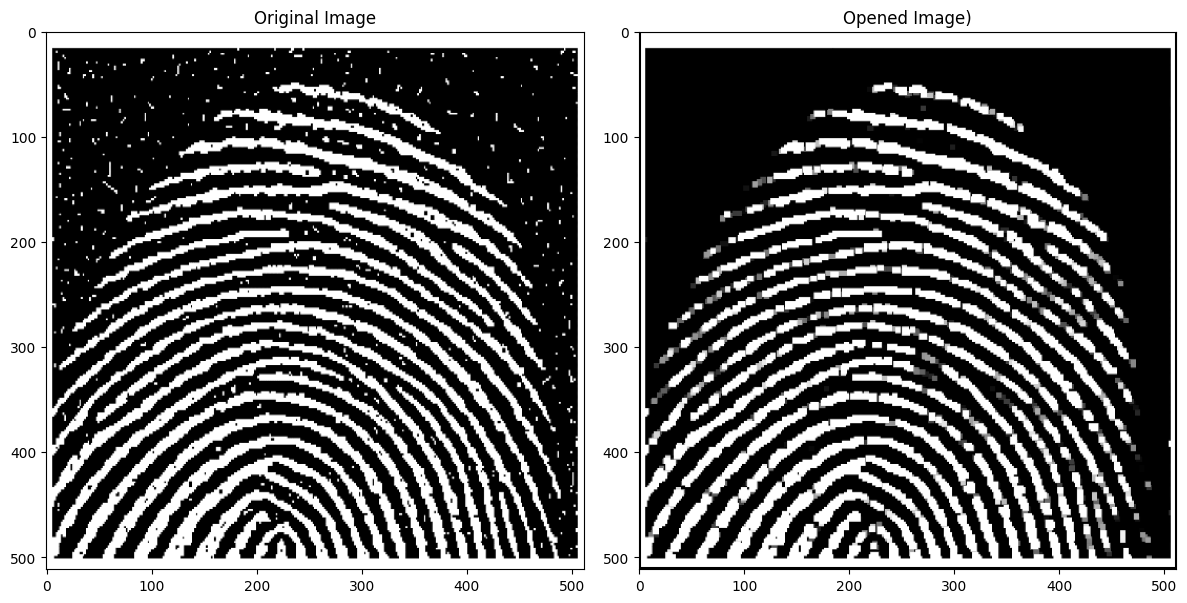

In [157]:
plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
plt.imshow(gray_image1, cmap='gray')
plt.title(f"Original Image")

plt.subplot(1, 2, 2)
plt.imshow(oppened_image, cmap='gray')
plt.title(f"Opened Image)")

plt.tight_layout()
plt.show()

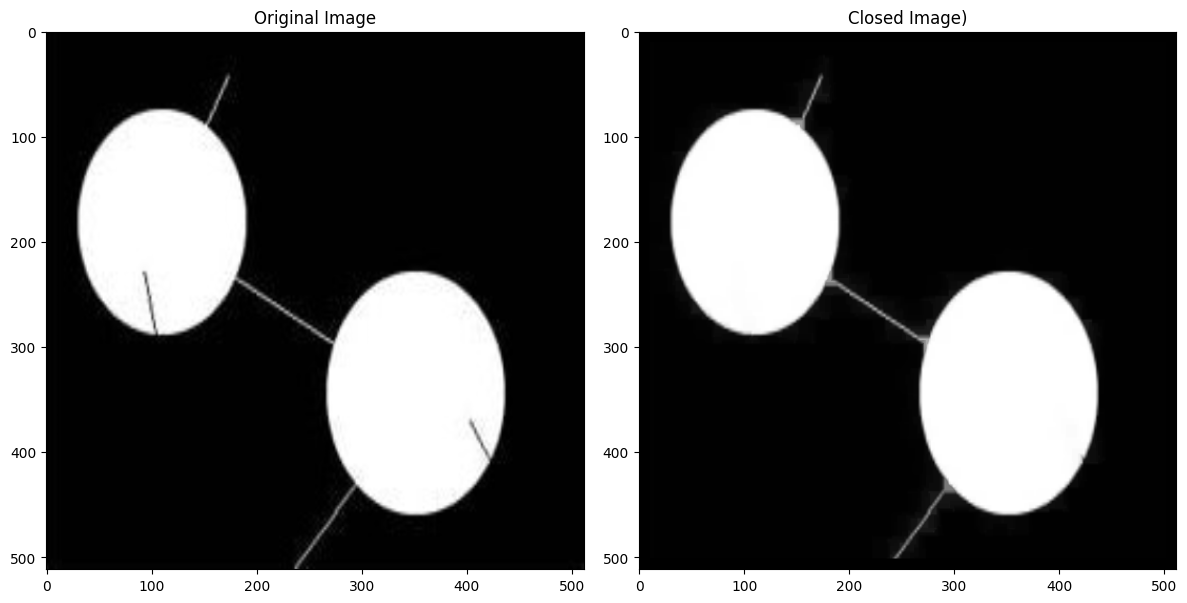

In [158]:
plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
plt.imshow(gray_image2, cmap='gray')
plt.title(f"Original Image")

plt.subplot(1, 2, 2)
plt.imshow(closed_image, cmap='gray')
plt.title(f"Closed Image)")

plt.tight_layout()
plt.show()